In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) 

In [2]:
df = pd.read_csv('Transformed_Data/df_combined_with_year.csv')

df = df[df['Month'] != 'Ave']

df_new = df.drop(columns=['All items'])



df_new

,Month,Year,Food and Non-Alcoholic Beverages,Alcoholic Beverages and Tobacco,Clothing and Footwear,"Housing, Water, Electricity, Gas and Other Fuels","Furnishings, Household Equipment and Routine Household Maintenance",Health,Transport,Information and Communication,"Recreation, Sport and Culture",Education Services,Restaurants and Accommodation Services,Financial Services,"Personal Care, and Miscellaneous Goods and Services"
0,Jan,2025,128.9,174.7,117.0,118.8,120.2,121.5,128.9,103.1,114.5,115.4,125.6,142.4,118.4
1,Feb,2025,129.3,175.9,117.4,119.8,120.7,122.0,130.6,103.1,114.9,115.4,126.5,142.4,119.0
2,Mar,2025,128.9,176.3,117.9,119.8,121.1,122.4,130.9,103.1,115.2,115.4,127.5,142.4,119.3
3,Apr,2025,128.7,176.5,118.2,119.2,121.2,122.5,131.7,103.2,115.4,115.4,127.8,142.4,119.6
4,May,2025,128.7,176.8,118.4,119.8,121.5,122.7,131.1,103.2,115.5,115.4,128.2,142.4,119.8
5,Jun,2025,129.5,177.0,118.5,118.4,121.6,122.9,130.7,103.2,115.7,115.4,128.4,142.4,120.0
6,Jul,2025,130.4,177.0,118.7,120.0,121.8,123.1,131.5,103.2,115.9,118.1,128.6,142.4,120.3
7,Aug,2025,130.4,177.2,119.0,120.9,121.9,123.2,129.6,103.2,116.5,120.1,128.7,142.4,120.5
8,Sep,2025,129.8,177.5,119.1,121.2,122.1,123.5,127.9,103.2,116.7,120.1,128.7,142.4,120.7
9,Oct,2025,130.4,177.8,119.2,120.9,122.2,123.7,128.0,103.2,116.9,120.1,128.8,142.4,120.9


Plotting the CPI Trends

In [3]:
melt_df = pd.melt(df_new, id_vars=['Year', 'Month'], var_name='CPI_Type', value_name='CPI_Value')

melt_df

# Create a datetime column for better sorting
melt_df['Date'] = pd.to_datetime(melt_df['Year'].astype(str) + '-' + melt_df['Month'], format='%Y-%b')

melt_df

,Year,Month,CPI_Type,CPI_Value,Date
0,2025,Jan,Food and Non-Alcoholic Beverages,128.9,2025-01-01
1,2025,Feb,Food and Non-Alcoholic Beverages,129.3,2025-02-01
2,2025,Mar,Food and Non-Alcoholic Beverages,128.9,2025-03-01
3,2025,Apr,Food and Non-Alcoholic Beverages,128.7,2025-04-01
4,2025,May,Food and Non-Alcoholic Beverages,128.7,2025-05-01
...,...,...,...,...,...
229,2025,Feb,"Personal Care, and Miscellaneous Goods and Ser...",122.1,2025-02-01
230,2025,Mar,"Personal Care, and Miscellaneous Goods and Ser...",122.4,2025-03-01
231,2025,Apr,"Personal Care, and Miscellaneous Goods and Ser...",122.6,2025-04-01
232,2025,May,"Personal Care, and Miscellaneous Goods and Ser...",122.8,2025-05-01


Phillipine CPI Consumer Price Index Trends

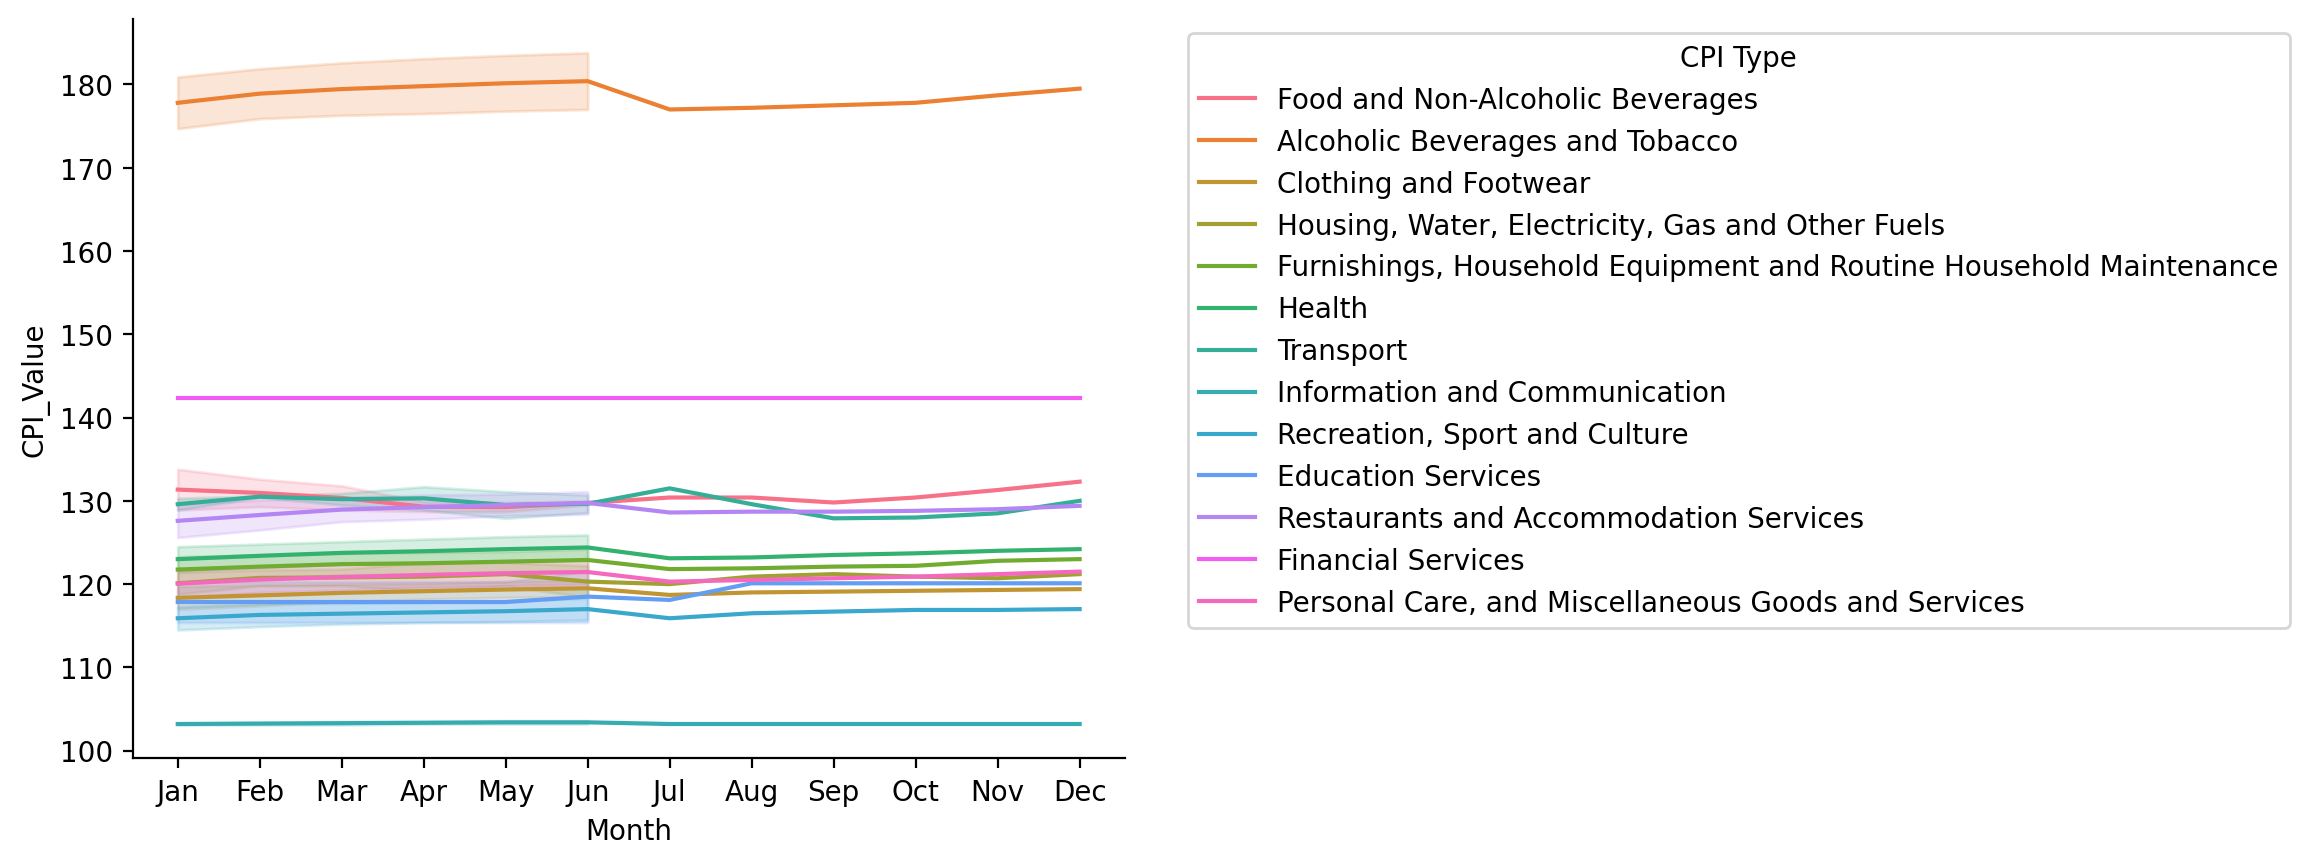

In [4]:
sns.lineplot(data=melt_df, x='Month', y='CPI_Value', hue='CPI_Type')

plt.legend(title='CPI Type', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()

Enhancing Figure

In [5]:
fig = px.line(
    data_frame=melt_df,
    x='Date',
    y='CPI_Value',
    color='CPI_Type',
    title='CPI Values by Month and Type',
    template='plotly_white'
)
fig.show()

Computation of Standard Deviation

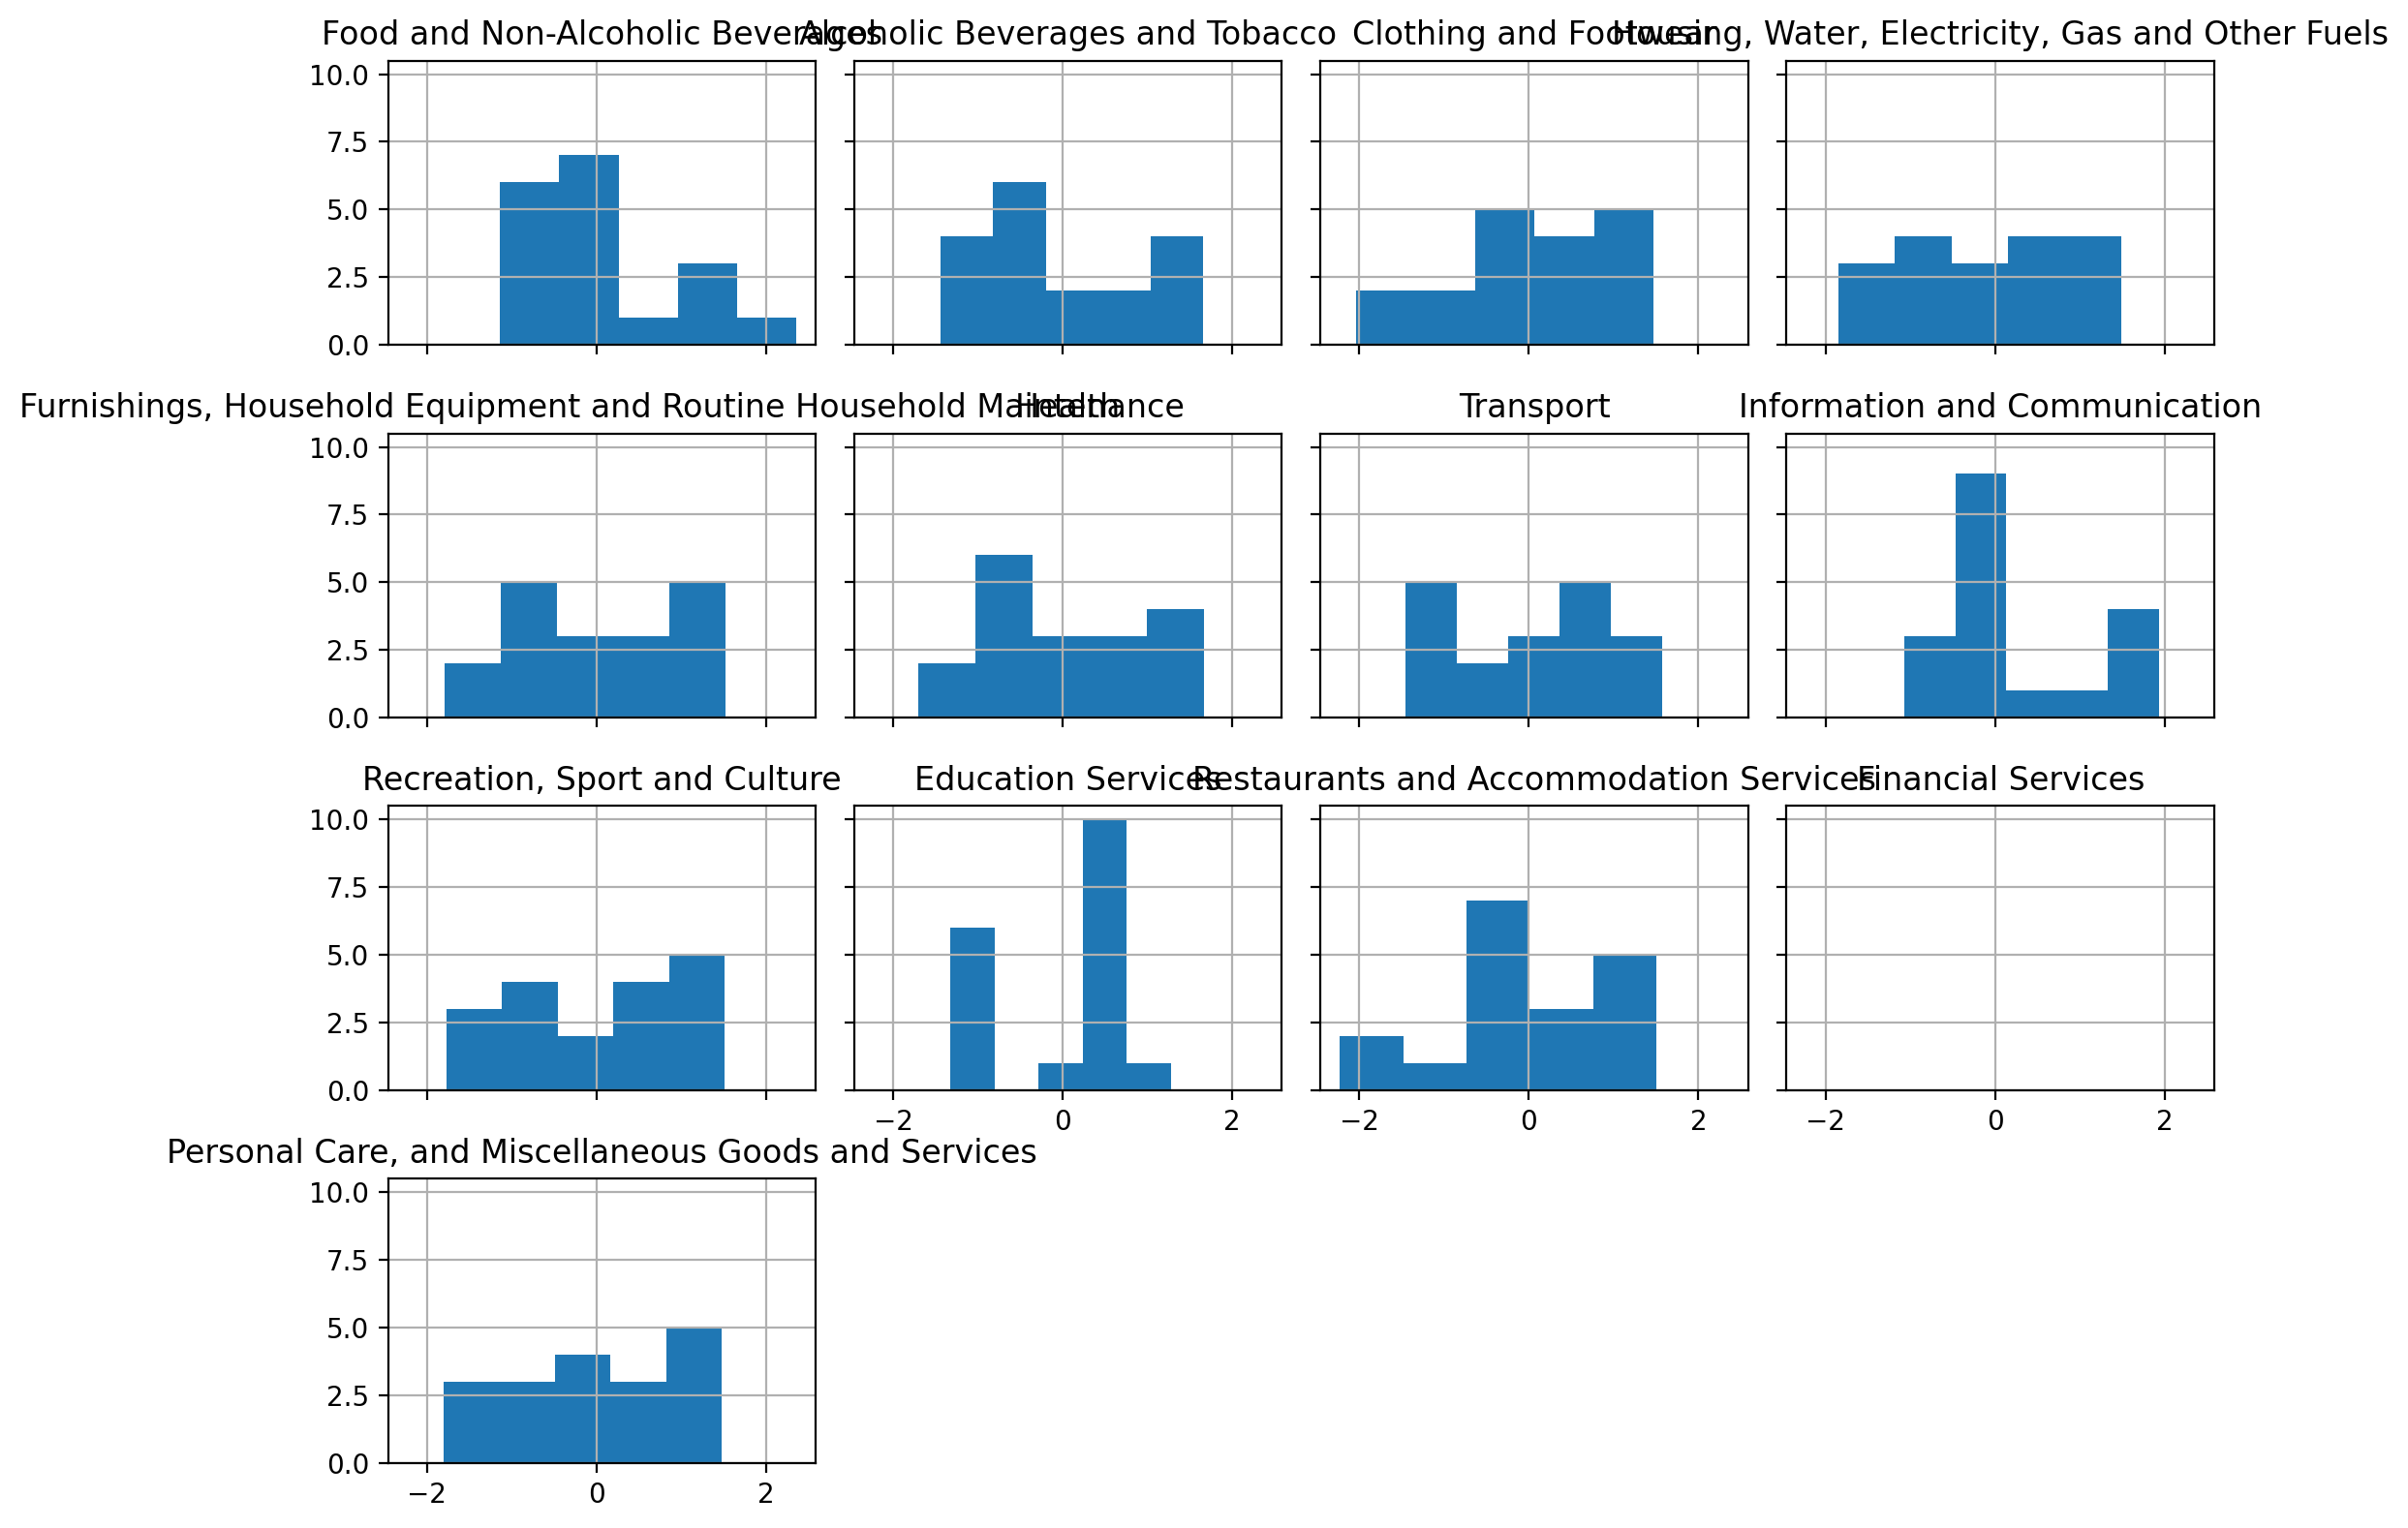

In [6]:
# Select only numeric columns for standardization and plotting
numeric_cols = df_new.select_dtypes(include='number').columns

# Standardize the numeric columns
standardized = (df_new[numeric_cols] - df_new[numeric_cols].mean()) / df_new[numeric_cols].std()

standardized.hist(sharex=True, sharey=True, figsize=(10, 8), bins=5)

plt.tight_layout()

In [7]:
# Select only numeric columns for standardization and plotting
numeric_cols = df_new.select_dtypes(include='number').columns

# Standardize the numeric columns
standardized = (df_new[numeric_cols] - df_new[numeric_cols].mean()) / df_new[numeric_cols].std()


standardized = standardized.T

standardized

,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18
Food and Non-Alcoholic Beverages,-1.001513,-0.727335,-1.001513,-1.138603,-1.138603,-0.590246,0.026656,0.026656,-0.384612,0.026656,0.643558,1.329004,2.357174,1.534638,0.986281,-0.316067,-0.384612,-0.247522
Alcoholic Beverages and Tobacco,-1.439024,-1.030576,-0.894426,-0.826352,-0.724240,-0.656165,-0.656165,-0.588090,-0.485978,-0.383866,-0.077530,0.194769,0.671293,1.011666,1.249928,1.420115,1.556264,1.658376
Clothing and Footwear,-2.042970,-1.641074,-1.138705,-0.837283,-0.636335,-0.535861,-0.334913,-0.033491,0.066983,0.167457,0.267930,0.368404,0.669826,0.870774,0.971248,1.071722,1.272670,1.473618
"Housing, Water, Electricity, Gas and Other Fuels",-1.530632,-0.734349,-0.734349,-1.212119,-0.734349,-1.849144,-0.575093,0.141561,0.380446,0.141561,-0.017695,0.380446,0.539702,0.778587,0.858215,1.495241,1.495241,1.176728
"Furnishings, Household Equipment and Routine Household Maintenance",-1.792787,-1.378003,-1.046176,-0.963220,-0.714350,-0.631393,-0.465479,-0.382523,-0.216609,-0.133652,0.364088,0.530001,0.778871,0.944785,1.110698,1.193655,1.276612,1.525482
Health,-1.705206,-1.322491,-1.016319,-0.939777,-0.786691,-0.633605,-0.480519,-0.403976,-0.174348,-0.021262,0.208367,0.361453,0.591081,0.820710,1.050339,1.279967,1.509596,1.662682
Transport,-0.655700,0.700004,0.939246,1.577224,1.098740,0.779751,1.417730,-0.097469,-1.453173,-1.373426,-0.974689,0.221520,0.460762,0.540509,-0.177216,-0.655700,-1.453173,-0.894942
Information and Communication,-1.067924,-1.067924,-1.067924,-0.467217,-0.467217,-0.467217,-0.467217,-0.467217,-0.467217,-0.467217,-0.467217,-0.467217,0.133490,0.734198,1.334905,1.334905,1.935612,1.935612
"Recreation, Sport and Culture",-1.773072,-1.427107,-1.167633,-0.994650,-0.908159,-0.735176,-0.562194,-0.043246,0.129737,0.302720,0.302720,0.389211,0.648685,0.994650,0.994650,1.081141,1.254124,1.513598
Education Services,-1.327729,-1.327729,-1.327729,-1.327729,-1.327729,-1.327729,-0.193676,0.646364,0.646364,0.646364,0.646364,0.646364,0.730368,0.730368,0.730368,0.730368,0.730368,1.276394


Heatmap Visualization of Standard Deviation

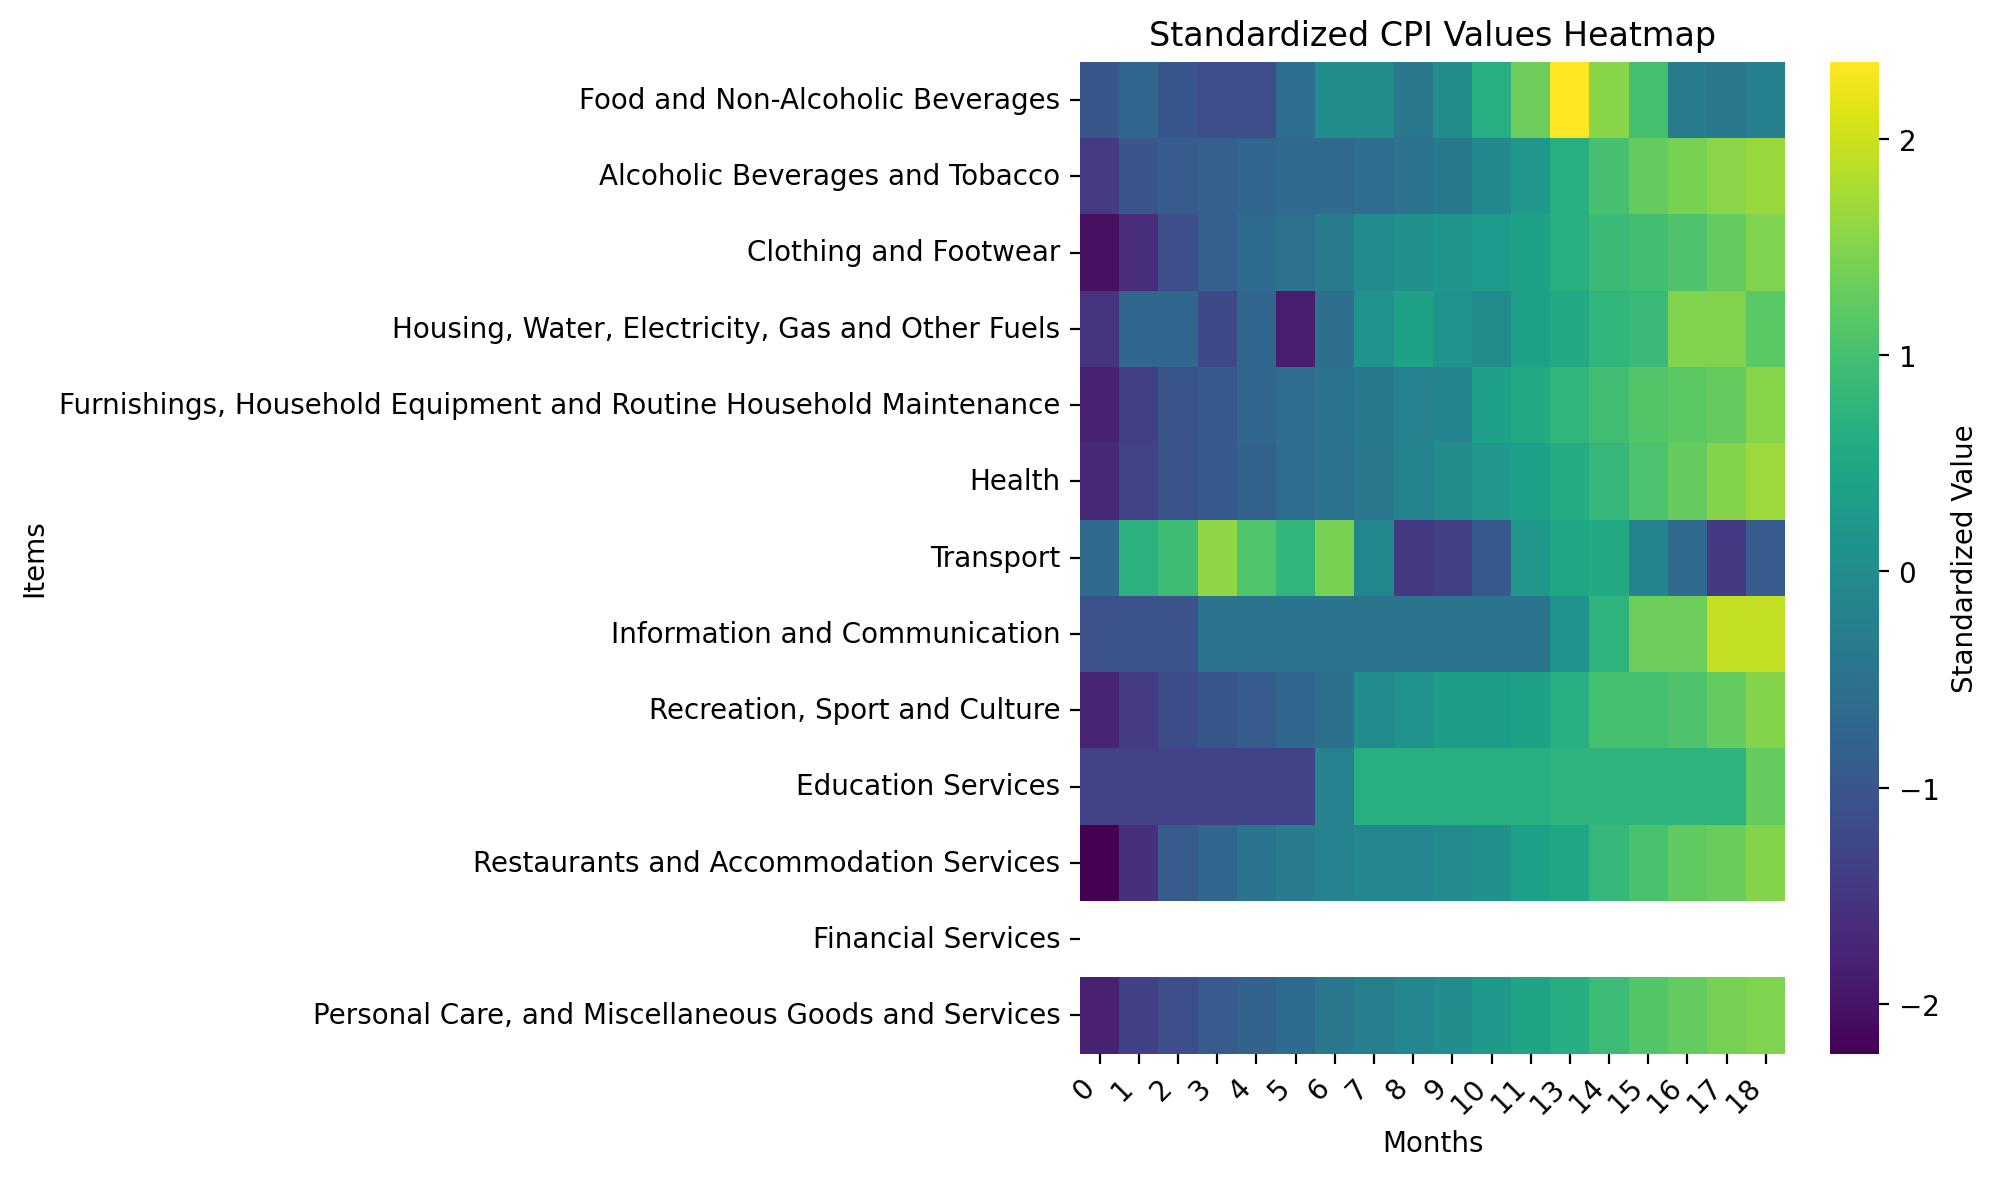

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(standardized, cmap='viridis',
                 cbar_kws={'label': 'Standardized Value'}, linewidths=0.0)

plt.xticks(rotation=45, ha='right')

plt.title('Standardized CPI Values Heatmap')
plt.xlabel('Months')
plt.ylabel('Items') 
plt.tight_layout()
plt.show()
